# Chapter 8. Resonant Perturbations#

### Action by Evelyn Zagarra Piedrahita, University of Antioquia

In this code it is intended to study in detail the chapter dedicated to Resonant Disturbances, so some interesting results are analyzed, mainly from the numerical part.

If you want to know more about the subject, consider seeing the book:

    Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.

In this notebook we will present theory from the Resonant Perturbations and some interesting mathematical developments and simulations will be presented that will serve to better understand the text.

For details on the theory: SOLAR SYSTEM DYNAMICS by the authors Murray and Dermott





## Packages required

In [20]:
# installing the packages
!pip install -q spiceypy
!pip install -q celluloid
!pip install -q rebound

  ERROR: Command errored out with exit status 1:
   command: /home/usuario/anaconda3/bin/python /home/usuario/anaconda3/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /tmp/tmpkfvtn7rg
       cwd: /tmp/pip-install-ago553jx/rebound_767c2a5cdfee44579b8e02ebffea2a47
  Complete output (30 lines):
  fatal: not a git repository (or any of the parent directories): .git
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-cpython-39
  creating build/lib.linux-x86_64-cpython-39/rebound
  copying rebound/interruptible_pool.py -> build/lib.linux-x86_64-cpython-39/rebound
  copying rebound/widget.py -> build/lib.linux-x86_64-cpython-39/rebound
  copying rebound/plotting.py -> build/lib.linux-x86_64-cpython-39/rebound
  copying rebound/citations.py -> build/lib.linux-x86_64-cpython-39/rebound
  copying rebound/units.py -> build/lib.linux-x86_64-cpython-39/rebound
  copying rebound/horizons.py -> build/lib.li

## Importing packages

In [16]:
# important libraries

import spiceypy as spy
import rebound 
import numpy as np
import celluloid as cell
import math
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'rebound'

## Section 8.2 The Geometry of resonance

Orbital resonance occurs when orbiting bodies exert regular, periodic gravitational influence on each other, usually because their orbital periods are related by a ratio of small integers. Most commonly, this relationship is found between a pair of objects (binary resonance).
A example of this is: [link text](https://en.wikipedia.org/wiki/Orbital_resonance#/media/File:Galilean_moon_Laplace_resonance_animation_2.gif)

There are two main types of resonances:

*  A **mean-motion orbital resonance** occurs when two bodies have periods of revolution that are a simple integer ratio of each other. Depending on the details, this can either stabilize or destabilize the orbit. Stabilization can occur when the two bodies move so synchronously that they never get too close.

For example:
The orbits of Pluto and the plutinos are stable, despite intersecting with that of the much larger Neptune, because they are in 2:3 resonance with it. The resonance ensures that as they approach perihelion and Neptune's orbit, Neptune is constantly distant (averaging a quarter of its orbit).

Orbital resonances can also destabilize one of the orbits. This process can be harnessed to find energy efficient ways to deorbit spacecraft.

For small bodies, destabilization is actually much more likely. For example:

In the asteroid belt within 3.5 AU of the Sun, the main mean-motion resonances with Jupiter are locations of gaps in the asteroid distribution, the Kirkwood gaps (especially at 4:1, 3:1, 5 :2, 7:3 and 2:1). Asteroids have been kicked out of these nearly empty lanes by repeated disturbances. However, there are still populations of asteroids temporarily present at or near these resonances.
*   A **secular resonance** occurs when the precession of two orbits is in sync (usually a perihelion precession or ascending node). A small body in secular resonance with a much larger one (for example, a planet) will precession at the same rate as the large body. Over a long time (a million years or so) a secular resonance will change the eccentricity and tilt of the small body.[link text](https://www.youtube.com/watch?v=WuuPoNZvThQ&ab_channel=MattClement)

Secular resonances are often studied to determine the long-term orbital evolution of asteroids and their families within the asteroid belt. A particularly well-known case is the secular resonance called v6, which determines the interaction of Saturn's orbital motion over the asteroid belt.

 


###**Jupiter and asteroid animation**

The idea of this notebook is to animate with simple conditions the orbit of the planet and the orbit of the asteroid that is in a 2:1 resonance with Jupiter.

### Experiment 1: Resonance visualization

It is intended to study the phenomenon of orbital resonance, from the concept that this occurs when the bodies in orbit exert a periodic and regular gravitational influence on each other, generally because their orbital periods are related by a ratio of small integers.

In this code we will try from the basic equations of celestial mechanics, using certain useful libraries and packages to be able to graph the orbit of an asteroid 2:1 with Jupiter and the orbit of Jupiter.

First, simple considerations are made regarding the dynamics of the bodies, the orbital elements of the asteroid or the planet are not taken into account, this in order to first understand the resonance, as is done in chapter 8 of the book.

Subsequently, the orbit of the planet and the asteroid will be animated, generating a simulation in time.

### Constants

#### initial condition



In [5]:
x = 0
y = 0
x1 = 7.76e11
y1 = 0
x2 = 4.9e11
y2 = 0

#### Numerical and physical constants

In [6]:
G = 6.67e-11 # gravitational constatnt [(m**3)(kg**-1)(s**-2)]
au = 1.496e11 # astronomical unit [m]
day = 86400 # [s]
year = 365.25*day # [s]

#### Astronomical constants

In [7]:
Msun = 1.98e30 #Jupiter mass [kg]
Mjup = 1.9e27 # Sun mass [kg]
mu = G * Msun # gravitational parameter [(m**3)(s**-2)]

### Configuration of the system

Taking Kepler's third law 

$(n^2)(a^3)=mu$

and the relationship of the period and the mean motion

$T=\frac{2\pi}{n}$

#### Planet

#### basic properties of the planet´s orbit

In [8]:
a_planet = 5.2038 * au # major semiaxis [m]
t_planet = np.linspace(0, 2*np.pi, 1000)

# eccentricity for a circular orbit, is not the true eccentricity of Jupiter's orbit
e_planet = 0 # eccentricity parameter []

# derived properties

# From Kepler's third law
n_planet = mu**(1/2) * a_planet**(-3/2) # mean motion [rad/s]
T_planet = 2*np.pi/n_planet # period [s]

print(f"the period of the planet: {T_planet} s = {T_planet/year} years")

the period of the planet: 375545568.6064863 s = 11.900320956171772 years


#### Asteroid

We started the resonance for that we describe the basic properties of the asteroid's orbit.

#### basic properties of the asteroid´s orbit

In [9]:
p = 1 # any integer, in this case at the 2:1 resonance
q = 1 # any integer, in this case at the 2:1 resonance
e_asteroid = 0 # eccentricity for a circular orbit, is not the true eccentricity of asteroid orbit
T_asteroid = (p/(p+q)) * T_planet # asteroid period 
t_ast = np.linspace(0, 2*np.pi, 1000)

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years") 
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

the period of the asteroid: 187772784.30324316 s = 5.950160478085886 years
the major semiaxis of the asteroid: 490417011526.3313 m = 3.278188579721466 au


### Simulation

We leave the time step fixed, just as we did not set the duration of the simulation.

We consider that the asteroid has no mass and that its eccentricity, like that of Jupiter, is equal to zero.


In [10]:
# simulation creation with rebound

sim = rebound.Simulation()
sim.units = ("kg", "m", "s")
sim.add(m=Msun)
sim.add(m=0,a=a_asteroid,e=e_asteroid)
sim.add(m=Mjup,a=a_planet,e=e_planet)

NameError: name 'rebound' is not defined

### Test code

The code from here is test code, just to see if something works.

In [11]:
# Calculate positions
x_planet = a_planet * (np.cos(t_planet) - e_planet)
y_planet = a_planet *  np.sqrt(1 - e_planet**2) * np.sin(t_planet)


x_ast = a_asteroid * (np.cos(t_ast) - e_asteroid)
y_ast = a_asteroid * np.sqrt(1 - e_asteroid**2) * np.sin(t_ast)

In [12]:
# plot the orbits
sim.particles[0].xyz

NameError: name 'sim' is not defined

In [13]:
sim.particles[1].xyz

NameError: name 'sim' is not defined

In [14]:
for orbit in sim.calculate_orbits():
    print(orbit)

NameError: name 'sim' is not defined

In [15]:
fig = rebound.OrbitPlot(sim, unitlabel="[m]")
plt.title('Jupiter and Asteroid Orbits')
plt.plot(sim.particles[1].xyz, "w", label='Asteroid')
plt.plot(sim.particles[2].xyz, "w",  label='Jupiter')
plt.legend(loc = 'upper right')

NameError: name 'rebound' is not defined

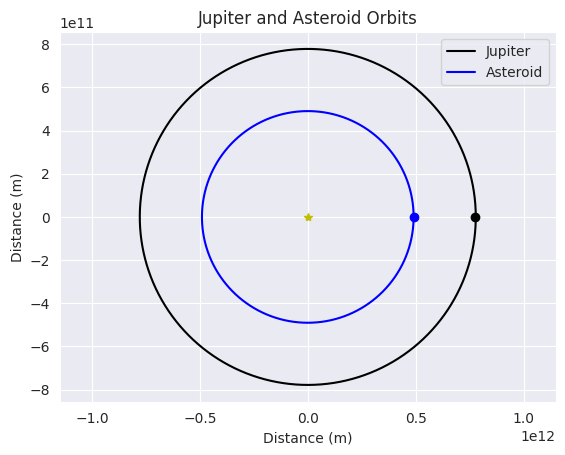

In [ ]:
x=0
y=0
# Plot orbits
import seaborn as sns

#customizing the appearance of the graph
sns.set_style("darkgrid")
sns.set_palette("husl")

plt.plot(x, y, 'y*')
plt.plot(x_planet, y_planet, 'k-', label='Jupiter')
plt.plot(x_ast, y_ast, 'b-',  label='Asteroid')
plt.plot(x1, y1, 'ko')
plt.plot(x2, y2, 'bo')

plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')# Chapter 8. Resonant Perturbations#
plt.title('Jupiter and Asteroid Orbits')
plt.legend(loc = 'upper right')

plt.axis("equal") 

plt.show()



In the graph above we represent the relative positions of Jupiter and an asteroid for the stable configuration when their orbital periods are in a 2:1 ratio. The diagram illustrates the configuration for t = 0.
The eccentricity of the asteroid's orbit is considered as e = 0, this is because we are considering the simplest case.

Given that the eccentricity of the asteroid's orbit is considered different from zero, this case would be when Jupiter and the asteroid are in conjunction and the asteroid is at the perihelion of its orbit

### Calculation of the period and the semimajor axis of asteroids for different values of q

#### for q = 2

In [ ]:
# Resonance 3:1for
p2 = 1 
q2 = 2 
e_asteroid = 0 # eccentricity for a circular orbit, is not the true eccentricity of asteroid orbit
T_asteroid = (p2/(p2+q2)) * T_planet # asteroid period 
t_ast = np.linspace(0, 2*np.pi, 1000)

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years") 
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

the period of the asteroid: 125181856.2021621 s = 3.9667736520572574 years
the major semiaxis of the asteroid: 374258225256.42194 m = 2.501726104655227 au


#### for q = 3

In [ ]:
# Resonance 4:1
p3 = 1 
q3 = 3 
e_asteroid = 0 # eccentricity for a circular orbit
T_asteroid = (p3/(p3+q3)) * T_planet # asteroid period 

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years") 
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

the period of the asteroid: 93886392.15162158 s = 2.975080239042943 years
the major semiaxis of the asteroid: 308943358024.2807 m = 2.065129398558026 au


if we note for q = 2, the resonance that is generated is 3:1; for q = 3, the resonance that occurs between the asteroid and the planet is 4:1, and so on.

In [ ]:
# Resonance 7:3
p4 = 3
q4 = 4
e_asteroid = 0 # eccentricity for a circular orbit
T_asteroid = (p4/(p4+q4)) * T_planet # asteroid period 

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years") 
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

the period of the asteroid: 160948100.83135128 s = 5.100137552645045 years
the major semiaxis of the asteroid: 442521456801.1859 m = 2.9580311283501732 au


In [ ]:
# Resonance 5:2
p5 = 2
q5 = 3
e_asteroid = 0 # eccentricity for a circular orbit
T_asteroid = (p5/(p5+q5)) * T_planet # asteroid period 

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years") 
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

the period of the asteroid: 150218227.44259453 s = 4.760128382468709 years
the major semiaxis of the asteroid: 422628568885.6377 m = 2.8250572786473107 au


## **Code for real asteroids**

The first thing we will do is get the semimajor axis and eccentricity of the asteroids of the main asteroid belt, then we intend to make a graph of the eccentricity vs semimajor axis (e vs a)

### Experiment 2: Plot of e vs a for different main belt asteroids



In [ ]:
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/colabs/Astrodinamica/asteroides-mb.csv")
df

,epoch_mjd,a,e,i,om,w,ma
0,60000,2.767,0.0788,10.59,80.26,73.47,17.22
1,60000,2.770,0.2301,34.93,172.92,310.86,357.85
2,60000,2.670,0.2565,12.99,169.84,247.74,351.82
3,60000,2.363,0.0888,7.14,103.76,151.60,115.13
4,60000,2.579,0.1879,5.36,141.52,358.89,256.03
...,...,...,...,...,...,...,...
574711,60000,3.078,0.1551,2.45,77.88,233.56,85.00
574712,60000,3.105,0.1042,11.81,51.84,39.50,322.26
574713,60000,3.044,0.1147,1.83,97.39,128.97,151.33
574714,60000,3.074,0.0829,15.65,175.36,161.64,60.12


#### definition of important variables for the graph

In [ ]:
# Semi-major axis for an asteroid at different resonances with Jupiter
a_asteroid_21 = 3.2781 # with q=1 and p=1
a_asteroid_31 = 2.5017 # with q=2 and p=1
a_asteroid_41 = 2.0651 # with q=3 and p=1
a_asteroid_73 = 2.9580 # with q=1 and p=2
a_asteroid_52 = 2.8250 # with q=2 and p=2
e_fx = 0.45
xs = df["a"]
ys = df["e"]

#### Graph a vs e

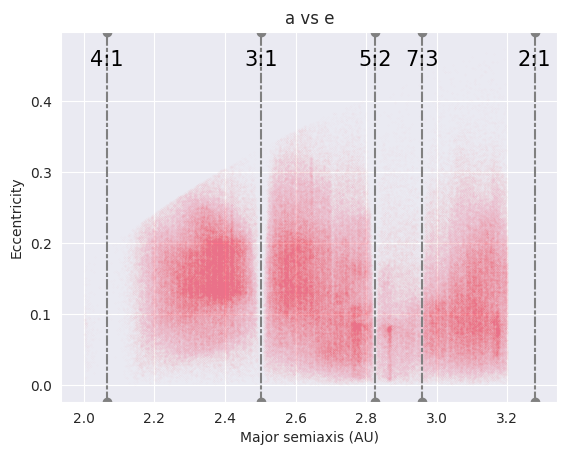

In [ ]:
plt.title("a vs e")
plt.xlabel('Major semiaxis (AU)')
plt.ylabel('Eccentricity')
plt.annotate("2:1",xy=(a_asteroid_21,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("3:1",xy=(a_asteroid_31,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("4:1",xy=(a_asteroid_41,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("5:2",xy=(a_asteroid_52,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("7:3",xy=(a_asteroid_73,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.plot(xs,ys,marker="o",lw=0,markersize=0.01)
plt.axvline(a_asteroid_21, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_41, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_31, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_52, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_73, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))


The above graph represents the position of the resonances but with real asteroids from the main asteroid belt

### Now we will show the orbit of a moon around a planet so that the moon has periapsis precession.

In [ ]:
deg = np.pi/180
rad = 1/deg

the orbital elements of an asteroid with e = 0.5 are chosen

In [ ]:
q = 1
e = 0.5
inc = 0*deg
Omega = 0*deg
omega = 0*deg
M = 0*deg
t0 = 0
mu = 1
elementos = [q, e, inc, Omega, omega, M, t0, mu]

We use SPICE with the routine "conics" to calculate the position of the asteroid in space (Cartesian)

In [ ]:

estado = spy.conics(elementos, t0)

In [ ]:
r = estado[:3]
v = estado[3:]

(-3.199999431062884,
 1.1999999729077564,
 -0.560540779106654,
 1.8412215329266135)

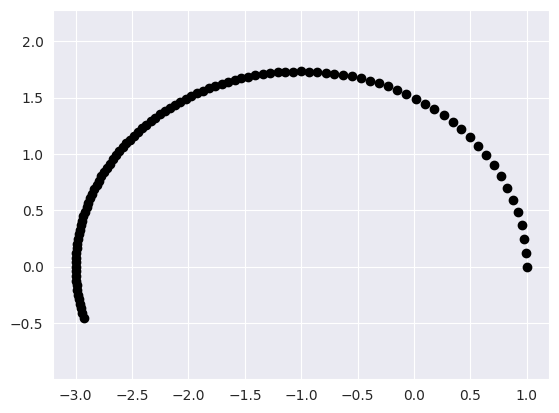

In [ ]:
ts = np.linspace(0,10,100)
for t in ts:
    elementos = [q, e, inc, Omega, omega, M, t0, mu]
    estado = spy.conics(elementos, t)
    r = estado[:3]
    v = estado[3:]
    plt.plot(r[0],r[1],'ko')

plt.axis("equal")

### Now we will make the periapsis of the orbit precess

(-3.1943234089186117,
 1.2025936108115656,
 -2.4575896309140304,
 1.8989463046772455)

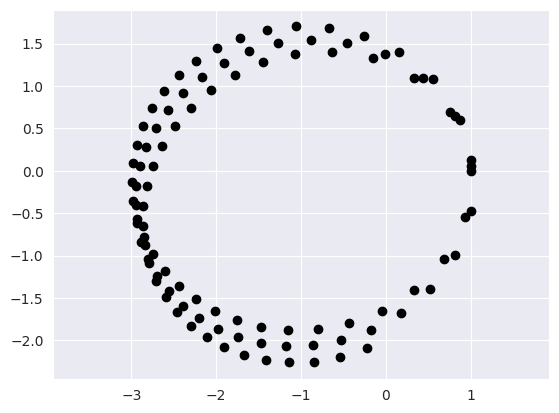

In [ ]:



ts = np.linspace(0,50,100)
omegap = 0.01 #the curlypi is fixed

for t in ts:

  omega = omegap*t
  elementos = [q, e, inc, Omega, omega, M, t0, mu]
  estado = spy.conics(elementos, t)
  r = estado[:3]
  v = estado[3:]
  plt.plot(r[0],r[1],"ko")

plt.axis("equal")

We notice that now omega has a different value at each time

In [ ]:
#Orbital elements of the disturbing planet

q2 = 3
e2 = 0
inc2 = 0*deg
Omega2 = 0*deg
omega2 = 0*deg
M2 = 0*deg

(-3.2999825088102925,
 3.2999991670862046,
 -3.2965131285230567,
 3.2994493789324664)

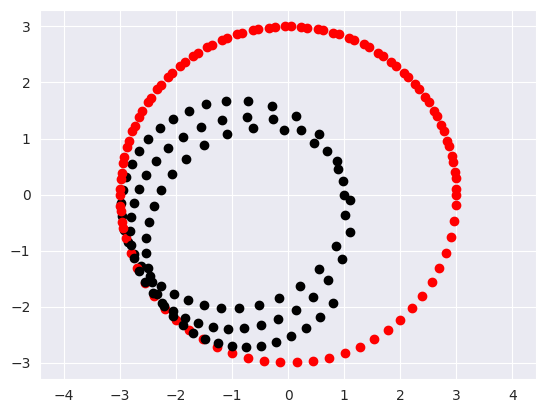

In [ ]:
ts = np.linspace(0,50,100)
omegap = 0.02

for t in ts:

    omega = omegap*t
    elementos = [q, e, inc, Omega, omega, M, t0, mu]
    estado = spy.conics(elementos, t)
    r = estado[:3]
    v = estado[3:]
    plt.plot(r[0],r[1],'ko')

    elementos2 = [q2, e2, inc2, Omega2, omega2, M2, t0, mu]
    estado = spy.conics(elementos2, t)
    r = estado[:3]
    v = estado[3:]
    plt.plot(r[0],r[1],'ro')

plt.axis("equal")

### To see the secular resonance

In [ ]:
t0 = 0
mu = 1

#Orbital elements of asteroid
q = 1
e = 0.7
inc = 0*deg
Omega = 0*deg
omega = 0*deg
M0 = 0*deg

#Orbital elements of the disturbing planet
q2 = 3
e2 = 0
inc2 = 0*deg
Omega2 = 0*deg
omega2 = 0*deg
M2 = 0*deg

(-12.865678048136608,
 12.865678048136608,
 -12.865678048136584,
 12.865678048136608)

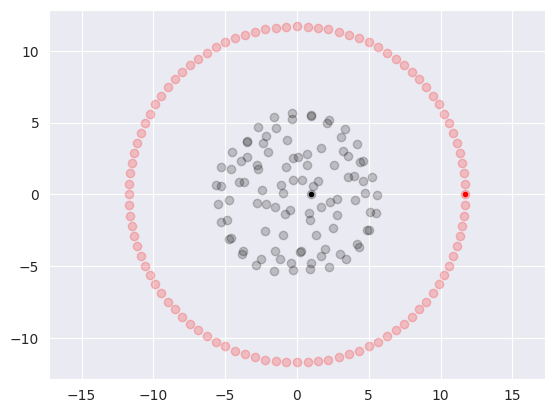

In [ ]:
omegap = 0.05

omega_planet = omegap/2 ##Secular resonance 2:1
Tomega = 2*np.pi/omega_planet
ares = (mu/omega_planet**2)**(1/3)

ts = np.arange(0,Tomega,Tomega/100)

for i,t in enumerate(ts):

  omega = omegap * t
  elementos = [q, e, inc, Omega, omega, M0, t0, mu]
  estado = spy.conics(elementos, t)
  r = estado[:3]
  v = estado[3:]
  plt.plot(r[0],r[1],'ko',alpha=0.2)

  if i==0:
    plt.plot(r[0],r[1],'ko',ms=3)

  elementos2 = [ares, e2, inc2, Omega2, omega2, M2, t0, mu]
  estado = spy.conics(elementos2, t)
  r = estado[:3]
  v = estado[3:]
  plt.plot(r[0],r[1],"ro",alpha=0.2)

  if i==0:
    plt.plot(r[0],r[1],'ro',ms=3)

plt.axis("equal")

Let's animate the orbit at each time:

In [ ]:
from celluloid import Camera

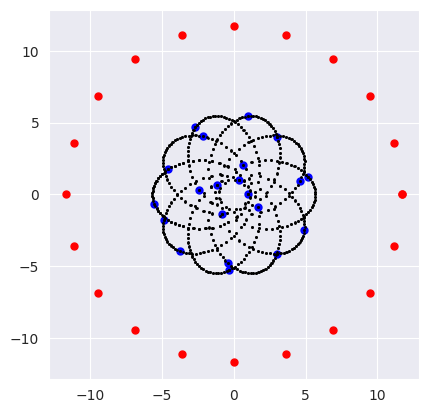

In [ ]:
fig,ax=plt.subplots(1,1)
camera=CaTomera(fig)

ts = np.arange(0,Tomega+0.5*Tomega/20,Tomega/20)

for i,t in enumerate(ts):

  omega = omegap * t

  elementos = [q, e, inc, Omega, omega, M0, t0, mu]
  estado = spy.conics(elementos, t)
  r = estado[:3]
  v = estado[3:]
  plt.plot(r[0],r[1],'bo',ms=5)

  ##This plot the whole oscullant orbit at each time
  for M in np.linspace(0,2*np.pi,50):
    elementos = [q, e, inc, Omega, omega, M, t0, mu]
    estado = spy.conics(elementos, t)
    r = estado[:3]
    v = estado[3:]
    plt.plot(r[0],r[1],'ko',ms=1)

  elementos2 = [ares, e2, inc2, Omega2, omega2, M2, t0, mu]
  estado = spy.conics(elementos2, t)
  r = estado[:3]
  v = estado[3:]
  ax.plot(r[0],r[1],"ro",ms=5)
  ax.set_aspect("equal")
  camera.snap()

In [ ]:
from IPython.display import HTML
anim=camera.animate()
HTML(anim.to_html5_video())

In [1]:
!pip install -q spiceypy

In [25]:
import spiceypy as spy
import matplotlib.pyplot as plt

In [26]:
import numpy as np
deg=np.pi/180
rad=1/deg

In [27]:
def calculate_ellipse(a,e,peri):
    mu=1
    q=a*(1-e)
    inc=0*deg
    node=0*deg
    M=0*deg
    rs=np.zeros((100,3))
    for i,M in enumerate(np.linspace(0,2*np.pi,100)):
        state=spy.conics([q,e,inc,node,peri,M,0,mu],0)
        rs[i]=state[:3]
    return rs

def point_in_ellipse(a,e,peri,M):
    mu=1
    q=a*(1-e)
    inc=0*deg
    node=0*deg
    state=spy.conics([q,e,inc,node,peri,M,0,mu],0)
    r=state[:3]
    return r

In [28]:

rs=calculate_ellipse(2,0.5,60*deg)
plt.plot(rs[:,0],rs[:,1],'r-')

rs1=calculate_ellipse(0.5,0.0,90*deg)
plt.plot(rs1[:,0],rs1[:,1],'k-')
´
r1=point_in_ellipse(0.5,0.0,180*deg,90*deg)
plt.plot(r1[0],r1[1],'ko')

r3=point_in_ellipse(2,0.5,60*deg,60*deg)
plt.plot(r3[0],r3[1],'ko')

plt.axis("equal");
plt.grid();

SyntaxError: invalid character '´' (U+00B4) (151757474.py, line 6)

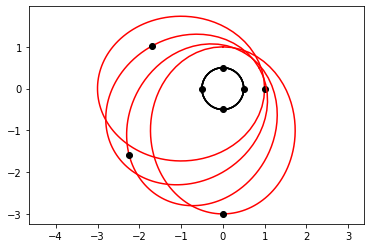

In [29]:
theta = [0, 30, 60, 90]

for angle in theta: 
  alpha=angle
  beta=3*angle
  phi=2*angle

  rs=calculate_ellipse(2,0.5,alpha*deg)
  plt.plot(rs[:,0],rs[:,1],'r-')

  rs1=calculate_ellipse(0.5,0.0,alpha*deg)
  plt.plot(rs1[:,0],rs1[:,1],'k-')

  r1=point_in_ellipse(0.5,0.0,90*deg,beta*deg)
  plt.plot(r1[0],r1[1],'ko')

  r3=point_in_ellipse(2,0.5,alpha*deg,phi*deg)
  plt.plot(r3[0],r3[1],'ko')

  plt.axis("equal");
  plt.grid();


In [30]:
np.arange(0,450+15,30)

array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360,
       390, 420, 450])

In [ ]:
#theta = [0, 30, 60, 90, 120, 150, 180, 210, 240, 170, 300, 330, 360, 390, 420,450]
theta = np.arange(0,450+15,30)



#fig, ax = plt.subplots(3, 4)

e = 0.5
ap = 2
aa = 0.5

k=0    #(numerConjunctionso de dibujo)

fila=[0,0,0,1,0,2,0,3,1,0,1,1,1,2,1,3,2,0,2,1,2,2,2,3,3,0,3,1,3,2,3,3]
fig, ax = plt.subplots(4, 4, figsize=(10,10), sharex = True)

#Puesto
periodo_planeta = 12
n_planeta = 2*np.pi/periodo_planeta

periodo_asteroide = 8
n_asteroide = 2*np.pi/periodo_asteroide

#Calculados
periodo_periapsis = 1/(2/periodo_planeta - 1/periodo_asteroide)
n_periapsis = 2*np.pi/periodo_periapsis

for i,t in enumerate(np.arange(0,periodo_periapsis+periodo_periapsis/4+1,2)):

    alpha = n_periapsis*t*rad
    beta = n_asteroide*t*rad
    phi = n_planeta*t*rad
    #print(alpha,beta,phi)

    rs=calculate_ellipse(ap,e,alpha*deg)
    rs1=calculate_ellipse(aa,0.0,alpha*deg)
    r1=point_in_ellipse(aa,0.0,0.0,beta*deg)
    r2=point_in_ellipse(ap,e,alpha*deg,0)
    ax[fila[2*i],fila[2*i+1]].plot(rs[:,0],rs[:,1],'r-')
    ax[fila[2*i],fila[2*i+1]].plot(rs1[:,0],rs1[:,1],'k-')
    ax[fila[2*i], fila[2*i+1]].plot(r1[0],r1[1],'ko')
    ax[fila[2*i], fila[2*i+1]].plot(r2[0],r2[1],'b*',ms=15)

    #Posición del planeta
    f = -(alpha-phi)
    E = 2*np.arctan(np.sqrt((1-e)/(1+e))*np.tan(f*deg/2))
    M = E - e*np.sin(E)
    #print(f"f = {f}, E = {E*rad}, M = {M*rad}")
    r3=point_in_ellipse(2,0.5,alpha*deg,M)

    ax[fila[2*i], fila[2*i+1]].plot(r3[0],r3[1],'yo')
    ax[fila[2*i],fila[2*i+1]].axis('equal')

for i in range(4):
    for j in range(4):
        ax[i,j].set_xlim(-4,4)
        ax[i,j].set_ylim(-4,4)
        ax[i,j].grid()
  
fig.tight_layout()


Let's animate the motion using celluloid.

We are going to draw what we want to animate and have the frames at each beat

In [ ]:
#theta = [0, 30, 60, 90, 120, 150, 180, 210, 240, 170, 300, 330, 360, 390, 420,450]
theta = np.arange(0,450+15,30)



#fig, ax = plt.subplots(3, 4)

e = 0.5
ap = 2
aa = 0.5

k=0    #(numero de dibujo)

fila=[0,0,0,1,0,2,0,3,1,0,1,1,1,2,1,3,2,0,2,1,2,2,2,3,3,0,3,1,3,2,3,3]
#fig, ax = plt.subplots(4, 4, figsize=(10,10), sharex = True)

#Puesto
periodo_planeta = 12
n_planeta = 2*np.pi/periodo_planeta

periodo_asteroide = 8
n_asteroide = 2*np.pi/periodo_asteroide

#Calculados
periodo_periapsis = 1/(2/periodo_planeta - 1/periodo_asteroide)
n_periapsis = 2*np.pi/periodo_periapsis

plt.ioff()
fig, ax = plt.subplots()
camera = cell.Camera(fig)

Nt = 1000
n = int(Nt/100)

for i,t in enumerate(np.arange(0,periodo_periapsis+periodo_periapsis/4+1,2)):

    alpha = n_periapsis*t*rad
    beta = n_asteroide*t*rad
    phi = n_planeta*t*rad
    #print(alpha,beta,phi)

    rs=calculate_ellipse(ap,e,alpha*deg)
    rs1=calculate_ellipse(aa,0.0,alpha*deg)
    r1=point_in_ellipse(aa,0.0,0.0,beta*deg)
    r2=point_in_ellipse(ap,e,alpha*deg,0)
    ax.plot(rs[:,0],rs[:,1],'r-')
    ax.plot(rs1[:,0],rs1[:,1],'k-')
    ax.plot(r1[0],r1[1],'ko')
    ax.plot(r2[0],r2[1],'b*',ms=15)

    #Posición del planeta
    f = -(alpha-phi)
    E = 2*np.arctan(np.sqrt((1-e)/(1+e))*np.tan(f*deg/2))
    M = E - e*np.sin(E)
    #print(f"f = {f}, E = {E*rad}, M = {M*rad}")
    r3=point_in_ellipse(2,0.5,alpha*deg,M)

    ax.plot(r3[0],r3[1],'yo')
    ax.axis('equal')
    camera.snap()

plt.close()
plt.ion();


Now it's time to create the animation:



In [ ]:
anim = camera.animate(interval=700)

Show the animation:

In [ ]:
HTML(anim.to_html5_video())

#### Now we will do a test to see what Jupiter's perihelion precession looks like based on Jupiter being in a different resonance with the Asteroid.

8.0


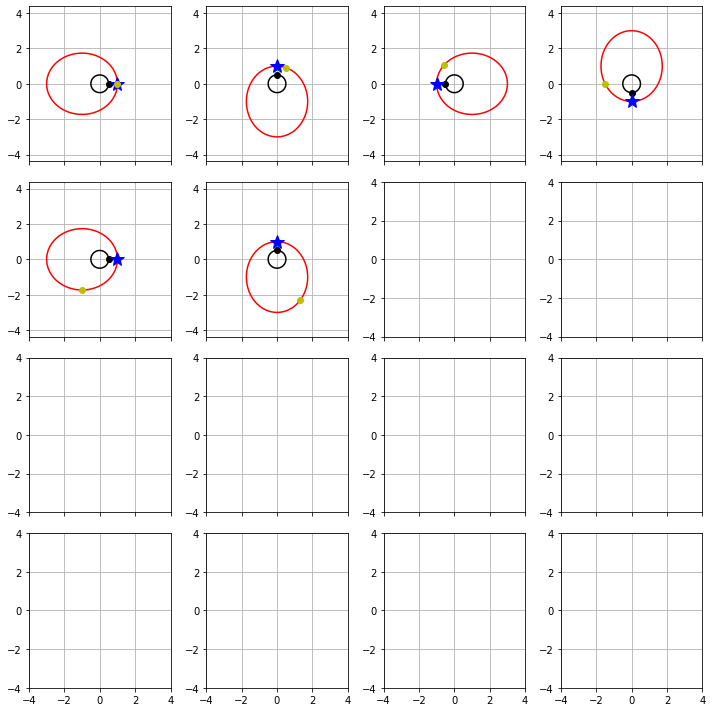

In [36]:
#theta = [0, 30, 60, 90, 120, 150, 180, 210, 240, 170, 300, 330, 360, 390, 420,450]
theta = np.arange(0,450+15,30)



#fig, ax = plt.subplots(3, 4)

e = 0.5
ap = 2
aa = 0.5

k=0    #(numero de dibujo)

fila=[0,0,0,1,0,2,0,3,1,0,1,1,1,2,1,3,2,0,2,1,2,2,2,3,3,0,3,1,3,2,3,3]
fig, ax = plt.subplots(4, 4, figsize=(10,10), sharex = True)

#Puesto
periodo_planeta = 12
n_planeta = 2*np.pi/periodo_planeta

periodo_asteroide = 8
n_asteroide = 2*np.pi/periodo_asteroide

#Calculados
periodo_periapsis_31 = 1/(3/periodo_planeta - 1/periodo_asteroide)
n_periapsis_31 = 2*np.pi/periodo_periapsis_31
print(periodo_periapsis_31)

for i,t in enumerate(np.arange(0,periodo_periapsis_31+periodo_periapsis_31/4+1,2)):

    alpha_31 = n_periapsis_31*t*rad
    beta = n_asteroide*t*rad
    phi = n_planeta*t*rad
    #print(alpha,beta,phi)

    rs=calculate_ellipse(ap,e,alpha_31*deg)
    rs1=calculate_ellipse(aa,0.0,alpha_31*deg)
    r1=point_in_ellipse(aa,0.0,0.0,beta*deg)
    r2=point_in_ellipse(ap,e,alpha_31*deg,0)
    ax[fila[2*i],fila[2*i+1]].plot(rs[:,0],rs[:,1],'r-')
    ax[fila[2*i],fila[2*i+1]].plot(rs1[:,0],rs1[:,1],'k-')
    ax[fila[2*i], fila[2*i+1]].plot(r1[0],r1[1],'ko')
    ax[fila[2*i], fila[2*i+1]].plot(r2[0],r2[1],'b*',ms=15)

    #Posición del planeta
    f = -(alpha_31-phi)
    E = 2*np.arctan(np.sqrt((1-e)/(1+e))*np.tan(f*deg/2))
    M = E - e*np.sin(E)
    #print(f"f = {f}, E = {E*rad}, M = {M*rad}")
    r3=point_in_ellipse(2,0.5,alpha_31*deg,M)

    ax[fila[2*i], fila[2*i+1]].plot(r3[0],r3[1],'yo')
    ax[fila[2*i],fila[2*i+1]].axis('equal')

for i in range(4):
    for j in range(4):
        ax[i,j].set_xlim(-4,4)
        ax[i,j].set_ylim(-4,4)
        ax[i,j].grid()
  
fig.tight_layout()

## Seccion 8.3 The Physics of Resonance

### **External resonance of the Hyperion 3:4 satellite with Titan**

In [ ]:
import math

# Parámetros orbitales de Hiperión
a_h = 1500600  # semieje mayor en metros
e_h = 0.1034   # excentricidad
P_h = 21.276   # periodo orbital en días

# Parámetros orbitales de Titán
a_t = 1221865  # semieje mayor en metros
e_t = 0.0288   # excentricidad
P_t = 15.95    # periodo orbital en días

# Cálculo de las frecuencias orbitales
n_h = 2 * math.pi / P_h  # frecuencia orbital de Hiperión en radianes/día
n_t = 2 * math.pi / P_t  # frecuencia orbital de Titán en radianes/día

# Cálculo de la resonancia
r = n_h / n_t
if math.isclose(r, 3/4, rel_tol=1e-3):
    print("Hiperión y Titán están en resonancia 3:4")
else:
    print("Hiperión y Titán no están en resonancia 3:4")

Hiperión y Titán están en resonancia 3:4


### **Conjunctions**

We want to verify the following fact:

If the conjunctions always occur exactly at either pericentre or apocentre, then the tangential force experienced by the particle immediately before conjunction is equal and opposite to the tangential force experienced immediately after conjunction.

First, let's remember that a conjunction occurs when two celestial bodies are at the same point in their orbit. At this point, the distance between the bodies is minimum (at the pericenter) or maximum (at the apocenter). In both cases, the relative velocity between the bodies is maximum.

Suppose that the particle moves in an elliptical orbit around a massive object of mass $M$ and radius $r$. The position of the particle in the orbit is given by the polar coordinates $(r,\theta)$, where $r$ is the distance of the particle from the massive object and $\theta$ is the angle between the line joining the particle and the massive object and a reference axis.

$r=\frac{a(1−e^2)}{1+ecos(θ)}$

where $a$ is the semimajor axis of the ellipse and $e$ is the eccentricity of the ellipse.

The gravitational force experienced by the particle is:

$F=\frac{GMm}{r^2}$

where $G$ is the gravitational constant, $m$ is the mass of the particle, and $r$ is the distance between the particle and the massive object.

The tangential component of the gravitational force is:

$F_{t}​=Fsin(ϕ)$

where $\phi$ is the angle between the line joining the particle and the massive object and the tangential direction.

To calculate the tangential component of the gravitational force at the pericenter or apocenter, we need to find the angle $\phi$ at those points. At the pericenter and apocenter, the particle moves in the radial direction, so the tangential direction is perpendicular to the radial direction. Therefore, the angle $\phi$ is equal to the polar angle $\theta$ at the pericenter or apocenter.

At the pericenter, $r=r_{p}=a(1-e)$, and at the apocenter, $r=r_{a}=a(1+e)$. Therefore, the tangential force experienced by the particle immediately before the conjunction is:

$F_{t}^{bef}=\frac{GMm}{r^2}​sin(θ)$ 

and the tangential force experienced by the particle immediately after the conjunction is:

$F_{t}^{aft}=\frac{GMm}{r^{2}}sin(-\Theta )=-\frac{GMm}{r^{2}}sin(\Theta )$

where we use the trigonometric identity $\sin(-\theta)=-\sin(\theta)$.

Therefore, the tangential force experienced by the particle at the pericenter or apocenter is equal and opposite before and after conjunction.

**Now** Let us consider this mental analysis with a symmetrical orbit

At the point of conjunction, the relative velocity between the bodies is maximum and the kinetic energy is maximum. Therefore, the total energy of the system is maximum at this point.

Now, let us consider the situation immediately before and after the conjunction. In both cases, the distance between the bodies is very similar, but the direction of motion of the orbiting body is different. Due to the symmetry of the orbit, the gravitational force and the potential energy are the same before and after the conjunction. Therefore, the difference in total energy before and after the conjunction is due solely to the difference in kinetic energy.

Since the total energy of the system is conserved, the difference in kinetic energy before and after the conjunction must be equal and opposite. This means that the velocity of the orbiting body immediately before and after the conjunction is equal and opposite. Since the tangential force is proportional to the acceleration, and the acceleration is the rate of change of velocity, this means that the tangential force immediately before and after the conjunction is equal and opposite.